In [81]:
import requests
from bs4 import BeautifulSoup

candidate_info_links ={}

for i in range(1,295):
    response = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id={}'.format(i))

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', id = 'table1')
    links =[]
    for row in table.find_all('td'):
        if row.a == None:
            continue
        else:
            links.append(row.a['href'])
    links = links[:3]
    new_links = []
    for link in links:
        link = 'https://myneta.info/westbengal2016/' + link
        new_links.append(link)
    candidate_info_links.update({i : new_links})
        


In [253]:
win_names = []
win_party = []
win_cons = []
win_email = []
win_mob =[]
ru1_names = []
ru1_party = []
ru1_cons = []
ru1_email = []
ru1_mob =[]
ru2_names = []
ru2_party = []
ru2_cons = []
ru2_email = []
ru2_mob =[]
win_age = []
ru1_age = []
ru2_age = []

for ac_no in range(1,295):
    print(ac_no)
    for position in range(3):
        req_get = requests.get(candidate_info_links[ac_no][position])
        soup = BeautifulSoup(req_get.text, 'html.parser')
        name = soup.find('h2', class_ = 'main-title')
        name = name.text
        cons = soup.find('h5')
        cons = cons.text[9:-9]
        for grid_2 in soup.find_all('div', class_ = 'grid_2 alpha' ):
            if grid_2.b.text == 'Party:':
                party = grid_2.text[7:]
            elif grid_2.b.text == 'Age:':
                age = int(grid_2.text[6:-9])
            elif grid_2.b.text == 'Email:':
                email = grid_2.text[6:]
            elif grid_2.b.text == 'Contact Number:':
                mob = grid_2.text[16:]
        
        if position == 0:
            win_names.append(name[:-9])
            win_cons.append(cons)
            win_party.append(party)
            win_age.append(age)
            win_email.append(email)
            win_mob.append(mob)
    
        if position == 1:
            ru1_names.append(name)
            ru1_cons.append(cons)
            ru1_party.append(party)
            ru1_age.append(age)
            ru1_email.append(email)
            ru1_mob.append(mob)
            
        if position ==2:
            ru2_names.append(name)
            ru2_cons.append(cons)
            ru2_party.append(party)
            ru2_age.append(age)
            ru2_email.append(email)
            ru2_mob.append(mob)
            
            
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


age = []
party = []
mob = []
email = []
for grid_2 in soup.find_all('div', class_ = 'grid_2 alpha' ):
    if grid_2.b.text == 'Party:' :
        party.append(grid_2.text[7:-2])
    elif grid_2.b.text == 'Age:':
        age.append(grid_2.text[6:-9])
    elif grid_2.b.text == 'Email:':
        email.append(grid_2.text[6:])
    elif grid_2.b.text == 'Contact Number:':
        mob.append(grid_2.text[16:])

age, party ,email, mob

grid_2[4].b.text

In [259]:
winner_data = {'Candidate Name': win_names, "Party": win_party, "Constituency": win_cons,
               "Email ID": win_email, "Phone No.": win_mob}
runnerup1_data = {'Candidate Name': ru1_names, "Party": ru1_party, "Constituency": ru1_cons,
               "Email ID": ru1_email, "Phone No.": ru1_mob}
runnerup2_data = {'Candidate Name': ru2_names, "Party": ru2_party, "Constituency": ru2_cons,
               "Email ID": ru2_email, "Phone No.": ru2_mob}

In [312]:
import pandas as pd
winner_df = pd.DataFrame(winner_data)
runup1_df = pd.DataFrame(runnerup1_data)
runup2_df = pd.DataFrame(runnerup2_data)

In [313]:
winner_df

,Candidate Name,Party,Constituency,Email ID,Phone No.
0,ARGHYA ROY PRADHAN,AITC\n,MEKLIGANJ (SC) (COOCHBEHAR),argharoy.aitmc@gmail.com,"03561-263260 , 9434806581"
1,BINAY KRISHNA BARMAN,AITC\n,MATHABHANGA (SC) (COOCHBEHAR),binaykb2@gmail.com,9734153777
2,NAGENDRA NATH ROY,AIFB\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,9609992665
3,MIHIR GOSWAMI,AITC\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),mihirgoswami54@gmail.com,9434367477
4,HITEN BARMAN,AITC\n,SITALKUCHI (SC) (COOCHBEHAR),hiten.aitc@gmail.com,03583256020
...,...,...,...,...,...
289,ABHIJIT ROY,AITC\n,MAYURESWAR (BIRBHUM),,8348504343
290,ASISH BANERJEE,AITC\n,RAMPURHAT (BIRBHUM),asishrph@yahoo.com,9434386498
291,MILTAN RASID,INC\n,HANSAN (BIRBHUM),,9434349272
292,MOINUDDIN SHAMS,AITC\n,NALHATI (BIRBHUM),aliafsar3850@gmail.com,"9831728786, 8282915437"


In [314]:
runup1_df

,Candidate Name,Party,Constituency,Email ID,Phone No.
0,BINOD ROY,Kamatapur Peoples Party (United)\n,MEKLIGANJ (SC) (COOCHBEHAR),,8116408881
1,HAREKRISHNA SARKAR,IND\n,MATHABHANGA (SC) (COOCHBEHAR),,8016638501
2,ANILCHANDRA ROY,SUCI(C)\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,"9474515689, 9563729373"
3,AKIK HOSSAIN CHOWDHURY,Kamatapur Peoples Party (United)\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),kamatpurpeoplesparty@gmail.com,9818219272
4,BAREN CHANDRA BARMAN,BJP\n,SITALKUCHI (SC) (COOCHBEHAR),,9932989105
...,...,...,...,...,...
289,ABUL KALAM AZAD,Welfare Party Of India\n,MAYURESWAR (BIRBHUM),,9733112033
290,ASHIS KUMAR PAL,Mulnibasi Party of India\n,RAMPURHAT (BIRBHUM),ashishkumarpal58@gmail.com,9232681681
291,ALI TANSER,SP\n,HANSAN (BIRBHUM),,9564340238
292,ABDUS SALAM,SUCI(C)\n,NALHATI (BIRBHUM),,9735588038


In [315]:
runup2_df

,Candidate Name,Party,Constituency,Email ID,Phone No.
0,DADHIRAM RAY,BJP\n,MEKLIGANJ (SC) (COOCHBEHAR),,9932347136
1,KANGSA RAJ BARMAN,Kamatapur Peoples Party (United)\n,MATHABHANGA (SC) (COOCHBEHAR),,9647722105
2,GOPAL ROY,IND\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,7585017585
3,AMITA DAS,Amra Bangalee\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),,9475837043
4,FUL KUMAR BARMAN,IND\n,SITALKUCHI (SC) (COOCHBEHAR),,8158067279
...,...,...,...,...,...
289,ARUP BAG,CPI(M)\n,MAYURESWAR (BIRBHUM),,8797624938
290,DUDH KUMAR MONDAL,BJP\n,RAMPURHAT (BIRBHUM),,9800962905
291,AMAL KUMAR MONDAL,SUCI(C)\n,HANSAN (BIRBHUM),,9775719714
292,ANIL SINGHA,BJP\n,NALHATI (BIRBHUM),,9474646276


In [268]:
winner_df.to_excel('Winner Data.xlsx', index = False)

In [269]:
runup1_df.to_excel('Runner up 1.xlsx', index = False)

In [270]:
runup2_df.to_excel('Runner up 2.xlsx', index = False)

In [318]:
winner_df["Age"] = win_age

In [319]:
runup1_df["Age"] = ru1_age

In [320]:
runup2_df["Age"] = ru2_age

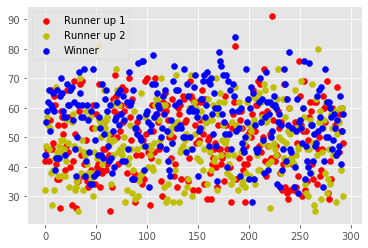

In [310]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(294)
plt.axes
plt.scatter(X, ru1_age, color = 'r', label = 'Runner up 1')
plt.scatter(X, ru2_age, color = 'y', label = 'Runner up 2')
plt.scatter(X, win_age, color ='b', label = 'Winner')
plt.legend(loc="upper left")
plt.savefig("ScatterAge.png")

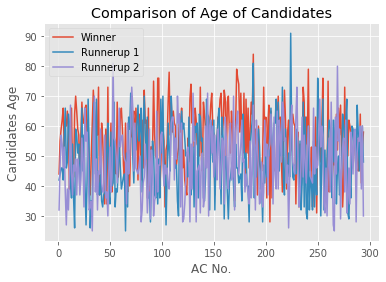

In [305]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_age, label="Winner")
plt.plot(N, ru1_age, label="Runnerup 1")
plt.plot(N, ru2_age, label="Runnerup 2")
plt.title("Comparison of Age of Candidates")
plt.xlabel("AC No.")
plt.ylabel("Candidates Age")
plt.legend(loc="upper left")
plt.savefig("ggplotBengal.png")

In [322]:
winner_df.describe()

,Age
count,294.000000
mean,55.346939
std,11.077544
min,28.000000
25%,47.000000
50%,56.500000
75%,63.000000
max,84.000000


In [323]:
runup1_df.describe()

,Age
count,294.000000
mean,49.159864
std,11.898818
min,25.000000
25%,40.000000
50%,49.000000
75%,59.000000
max,91.000000


In [324]:
runup2_df.describe()

,Age
count,294.000000
mean,48.156463
std,11.417728
min,25.000000
25%,39.000000
50%,47.000000
75%,56.000000
max,81.000000


# To check for wealth

In [344]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

win_wealth =[]
ru1_wealth = []
ru2_wealth = []
for ac_no in range(1,295):
    print(ac_no)
    for position in range(3):
        session = requests.Session()
        retry = Retry(connect=5, backoff_factor=0.5)
        adapter = HTTPAdapter(max_retries=retry)
        session.mount('http://', adapter)
        session.mount('https://', adapter)
        req_get = session.get(candidate_info_links[ac_no][position])
        soup = BeautifulSoup(req_get.text, 'html.parser')
        money = soup.find('div', class_ = "bottom-border-div red fullWidth")
        list_money = money.b.text[3:].split(",")
        money = "".join(list_money)
        if position == 0:
            try:
                win_wealth.append(int(money))
            except ValueError:
                win_wealth.append(0)
        if position == 1:
            try:
                ru1_wealth.append(int(money))
            except ValueError:
                ru1_wealth.append(0)
        if position == 2:
            try:
                ru2_wealth.append(int(money))
            except ValueError:
                ru2_wealth.append(0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [347]:
winner_df['Wealth'] = win_wealth

In [348]:
runup1_df['Wealth'] = ru1_wealth

In [349]:
runup2_df['Wealth'] = ru2_wealth

In [353]:
winner_df.describe()

,Age,Wealth
count,294.000000,2.940000e+02
mean,55.346939,1.480261e+07
std,11.077544,3.458823e+07
min,28.000000,4.973000e+04
25%,47.000000,2.761082e+06
50%,56.500000,5.911398e+06
75%,63.000000,1.332233e+07
max,84.000000,4.059230e+08


In [352]:
runup1_df.describe()

,Age,Wealth
count,294.000000,2.940000e+02
mean,49.159864,4.855526e+06
std,11.898818,1.614257e+07
min,25.000000,0.000000e+00
25%,40.000000,1.940178e+05
50%,49.000000,1.011221e+06
75%,59.000000,3.893584e+06
max,91.000000,1.741231e+08


In [354]:
runup2_df.describe()

,Age,Wealth
count,294.000000,2.940000e+02
mean,48.156463,3.905837e+06
std,11.417728,1.144224e+07
min,25.000000,0.000000e+00
25%,39.000000,1.568250e+05
50%,47.000000,1.139570e+06
75%,56.000000,3.520099e+06
max,81.000000,1.542042e+08


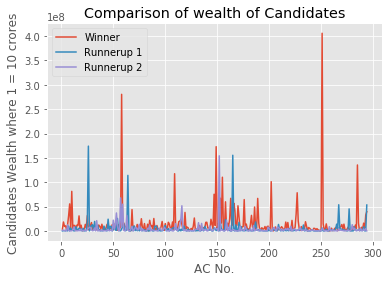

In [357]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_wealth, label="Winner")
plt.plot(N, ru1_wealth, label="Runnerup 1")
plt.plot(N, ru2_wealth, label="Runnerup 2")
plt.title("Comparison of wealth of Candidates")
plt.xlabel("AC No.")
plt.ylabel("Candidates Wealth where 1 = 10 crores")
plt.legend(loc="upper left")
plt.savefig("Wealth.png")

In [358]:
    
req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id=253')
soup = BeautifulSoup(req.text, 'html.parser')


In [364]:
win_case = []
ru1_case = []
ru2_case = []
for i in range(1,295):
    req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id={}'.format(i))
    soup = BeautifulSoup(req.text, 'html.parser')
    print(i)
    w = 0
    for case in soup.find_all('td', align = 'center'):
        w+=1
        if w==1:
            win_case.append(int(case.text))
        elif w==2:
            ru1_case.append(int(case.text))
            
        elif w==3:
            ru2_case.append(int(case.text))
            
        else:
            continue

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [366]:
winner_df['Cases'] = win_case
runup1_df['Cases'] = ru1_case
runup2_df['Cases'] = ru2_case

In [367]:
winner_df.describe()

,Age,Wealth,Cases
count,294.000000,2.940000e+02,294.000000
mean,55.346939,1.480261e+07,1.115646
std,11.077544,3.458823e+07,2.526358
min,28.000000,4.973000e+04,0.000000
25%,47.000000,2.761082e+06,0.000000
50%,56.500000,5.911398e+06,0.000000
75%,63.000000,1.332233e+07,1.000000
max,84.000000,4.059230e+08,21.000000


In [368]:
runup1_df.describe()

,Age,Wealth,Cases
count,294.000000,2.940000e+02,294.000000
mean,49.159864,4.855526e+06,0.462585
std,11.898818,1.614257e+07,1.400985
min,25.000000,0.000000e+00,0.000000
25%,40.000000,1.940178e+05,0.000000
50%,49.000000,1.011221e+06,0.000000
75%,59.000000,3.893584e+06,0.000000
max,91.000000,1.741231e+08,14.000000


In [369]:
runup2_df.describe()

,Age,Wealth,Cases
count,294.000000,2.940000e+02,294.000000
mean,48.156463,3.905837e+06,0.363946
std,11.417728,1.144224e+07,1.621167
min,25.000000,0.000000e+00,0.000000
25%,39.000000,1.568250e+05,0.000000
50%,47.000000,1.139570e+06,0.000000
75%,56.000000,3.520099e+06,0.000000
max,81.000000,1.542042e+08,21.000000


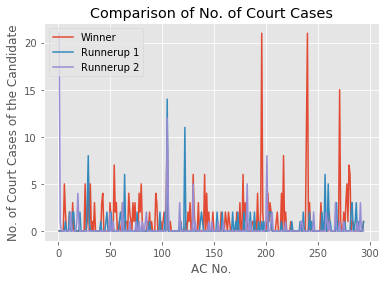

In [373]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_case, label="Winner")
plt.plot(N, ru1_case, label="Runnerup 1")
plt.plot(N, ru2_case, label="Runnerup 2")
plt.title("Comparison of No. of Court Cases")
plt.xlabel("AC No.")
plt.ylabel("No. of Court Cases of the Candidate")
plt.legend(loc="upper left")
plt.savefig('CriminalRec.png')